In [1]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import luhn

In [2]:
df = pd.read_csv('fraudTrain.csv')
df.drop(columns=df.columns[0], inplace=True)#removing record number

In [3]:
#basic data understanding

In [4]:
print(df.shape)
df.head()

(1296675, 22)


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [6]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
trans_date_trans_time,1296675,1274791,2019-04-22 16:02:01,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc_num,1296675.0,NaN,NaN,NaN,417192042079726656.0,1308806447000789248.0,60416207185.0,180042946491150.0,3521417320836166.0,4642255475285942.0,4992346398065154048.0
merchant,1296675,693,fraud_Kilback LLC,4403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,1296675,14,gas_transport,131659,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amt,1296675.0,NaN,NaN,NaN,70.351035,160.316039,1.0,9.65,47.52,83.14,28948.9
first,1296675,352,Christopher,26669,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,1296675,481,Smith,28794,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,1296675,2,F,709863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
street,1296675,983,0069 Robin Brooks Apt. 695,3123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,1296675,894,Birmingham,5617,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.duplicated().sum()

0

In [8]:
df.duplicated(subset='trans_num', keep=False).sum()

0

In [9]:
#Data transformation

In [10]:
#first and last names have no valueable information as we can't build systems biased against names
#trans_num also isn't useful as it is generated randomly
df.drop(columns=['first', 'last', 'trans_num'], inplace=True)

In [11]:
df.rename(columns={'trans_date_trans_time':'time', 'cc_num':'card'}, inplace=True)

In [13]:
#some data validation
print('Min time:', df['time'].min())
print('Max time:', df['time'].max())
print('time=unix_time', df[df['time'] == pd.to_datetime(df['unix_time'], unit='s').dt.strftime(date_format='%Y-%m-%d %H:%M:%S')].shape[0])

Min time: 2019-01-01 00:00:18
Max time: 2020-06-21 12:13:37
time=unix_time 0


In [14]:
pd.concat([df['time'],
           pd.to_datetime(df['unix_time'], unit='s').dt.strftime(date_format='%Y-%m-%d %H:%M:%S')],
           axis=1).head()

,time,unix_time
0,2019-01-01 00:00:18,2012-01-01 00:00:18
1,2019-01-01 00:00:44,2012-01-01 00:00:44
2,2019-01-01 00:00:51,2012-01-01 00:00:51
3,2019-01-01 00:01:16,2012-01-01 00:01:16
4,2019-01-01 00:03:06,2012-01-01 00:03:06


In [19]:
print('time+7y=unix_time', df[df['time'] == (pd.to_datetime(df['unix_time'], unit='s') 
                                             + pd.offsets.DateOffset(years=7)).dt.strftime(date_format='%Y-%m-%d %H:%M:%S')].shape[0], 'of', df.shape[0])

time+7y=unix_time 1296675 of 1296675


In [20]:
#trans_date_trans_time and unix_time have 7 years difference
#as per dataset description, feature time has correct year. 
#as per https://en.wikipedia.org/wiki/Payment_card_number, card number can be validated
invalid = 0

for card_num in df['card'].astype(str):
    if not luhn.verify(card_num):
        invalid += 1

print('Not valid card numbers:', invalid)

Not valid card numbers: 0


In [21]:
date = pd.to_datetime(df['unix_time'], unit='s') + pd.offsets.DateOffset(years=7)
date

0         2019-01-01 00:00:18
1         2019-01-01 00:00:44
2         2019-01-01 00:00:51
3         2019-01-01 00:01:16
4         2019-01-01 00:03:06
                  ...        
1296670   2020-06-21 12:12:08
1296671   2020-06-21 12:12:19
1296672   2020-06-21 12:12:32
1296673   2020-06-21 12:13:36
1296674   2020-06-21 12:13:37
Name: unix_time, Length: 1296675, dtype: datetime64[ns]

In [24]:
#now let's extract some information from existing features for further analysis
 
df['trans_month'] = date.dt.month
df['trans_day'] = date.dt.day
df['trans_day_time'] = df['unix_time'] % 86400
df['trans_hour'] = date.dt.hour 
df['trans_minute'] = date.dt.minute
df['trans_second'] = date.dt.second
df[['time', 'trans_month', 'trans_day', 'trans_hour', 'trans_minute', 'trans_second', 'unix_time', 'trans_day_time']].tail()

,time,trans_month,trans_day,trans_hour,trans_minute,trans_second,unix_time,trans_day_time
1296670,2020-06-21 12:12:08,6,21,12,12,8,1371816728,43928
1296671,2020-06-21 12:12:19,6,21,12,12,19,1371816739,43939
1296672,2020-06-21 12:12:32,6,21,12,12,32,1371816752,43952
1296673,2020-06-21 12:13:36,6,21,12,13,36,1371816816,44016
1296674,2020-06-21 12:13:37,6,21,12,13,37,1371816817,44017


In [31]:
#As time and unix_time represent same onformation(with 7 years difference), we can remove time
#First Name and L
df.drop(columns='time', inplace=True)

In [32]:
#card number contains issuer identification number(IIN), but it can be 6 or 8 digits long
#let's compare amount of unique first 6 or 8 digits with amount of cards
print('Cards amount:', len(df['card'].astype(str).unique()))
print('Unique 6 digit:', len(df['card'].astype(str).apply(lambda x: x[0:6]).unique()))
print('Unique 8 digit:', len(df['card'].astype(str).apply(lambda x: x[0:8]).unique()))

Cards amount: 983
Unique 6 digit: 960
Unique 8 digit: 983


In [34]:
#amount of 8 digit IIN is same as number of cards, so it's more likely that cards have 6-digit IINs
#card number has no more useful information for us
df['iin'] = df['card'].astype(str).apply(lambda x: x[0:6])
df.drop(columns='card', inplace=True)

In [40]:
#most obvious usage of coordinates is calculation of distance
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371
    return c * r

df['distance'] = haversine(df['lat'], df['long'], df['merch_lat'], df['merch_long'])

In [43]:
#age is derivative feature of date of birth
df['age'] = (pd.to_datetime('today') - pd.to_datetime(df['dob'], format='%Y-%m-%d')).dt.days/365  
df.drop(columns='dob', inplace=True)
df['age']

0          36.649315
1          46.372603
2          62.802740
3          57.819178
4          38.600000
             ...    
1296670    62.956164
1296671    44.898630
1296672    57.189041
1296673    44.210959
1296674    29.208219
Name: age, Length: 1296675, dtype: float64

In [57]:
#for easier analysis I encode non-numerical features
encoders = {}#  in case string values will be needed

for col in ['merchant', 'category', 'street', 'city', 'state', 'job', 'gender', 'iin']:
    enc = LabelEncoder()
    df[col] = enc.fit_transform(df[col])
    encoders[col] = enc

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 25 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   merchant        1296675 non-null  int64  
 1   category        1296675 non-null  int64  
 2   amt             1296675 non-null  float64
 3   gender          1296675 non-null  int64  
 4   street          1296675 non-null  int64  
 5   city            1296675 non-null  int64  
 6   state           1296675 non-null  int64  
 7   zip             1296675 non-null  int64  
 8   lat             1296675 non-null  float64
 9   long            1296675 non-null  float64
 10  city_pop        1296675 non-null  int64  
 11  job             1296675 non-null  int64  
 12  unix_time       1296675 non-null  int64  
 13  merch_lat       1296675 non-null  float64
 14  merch_long      1296675 non-null  float64
 15  is_fraud        1296675 non-null  int64  
 16  trans_month     1296675 non-null  in

In [47]:
df.head()

,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,trans_month,trans_day,trans_day_time,trans_hour,trans_minute,trans_second,iin,distance,age
0,514,8,4.97,0,568,526,27,28654,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315,0,1,1,18,0,0,18,103,78.597568,36.649315
1,241,4,107.23,0,435,612,47,99160,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462,0,1,1,44,0,0,44,885,30.212176,46.372603
2,390,0,220.11,1,602,468,13,83252,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481,0,1,1,51,0,0,51,467,108.206083,62.802740
3,360,2,45.00,1,930,84,26,59632,46.2306,-112.1138,1939,328,1325376076,47.034331,-112.561071,0,1,1,76,0,1,16,266,95.673231,57.819178
4,297,9,41.96,1,418,216,45,24433,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459,0,1,1,186,0,3,6,427,77.556744,38.600000


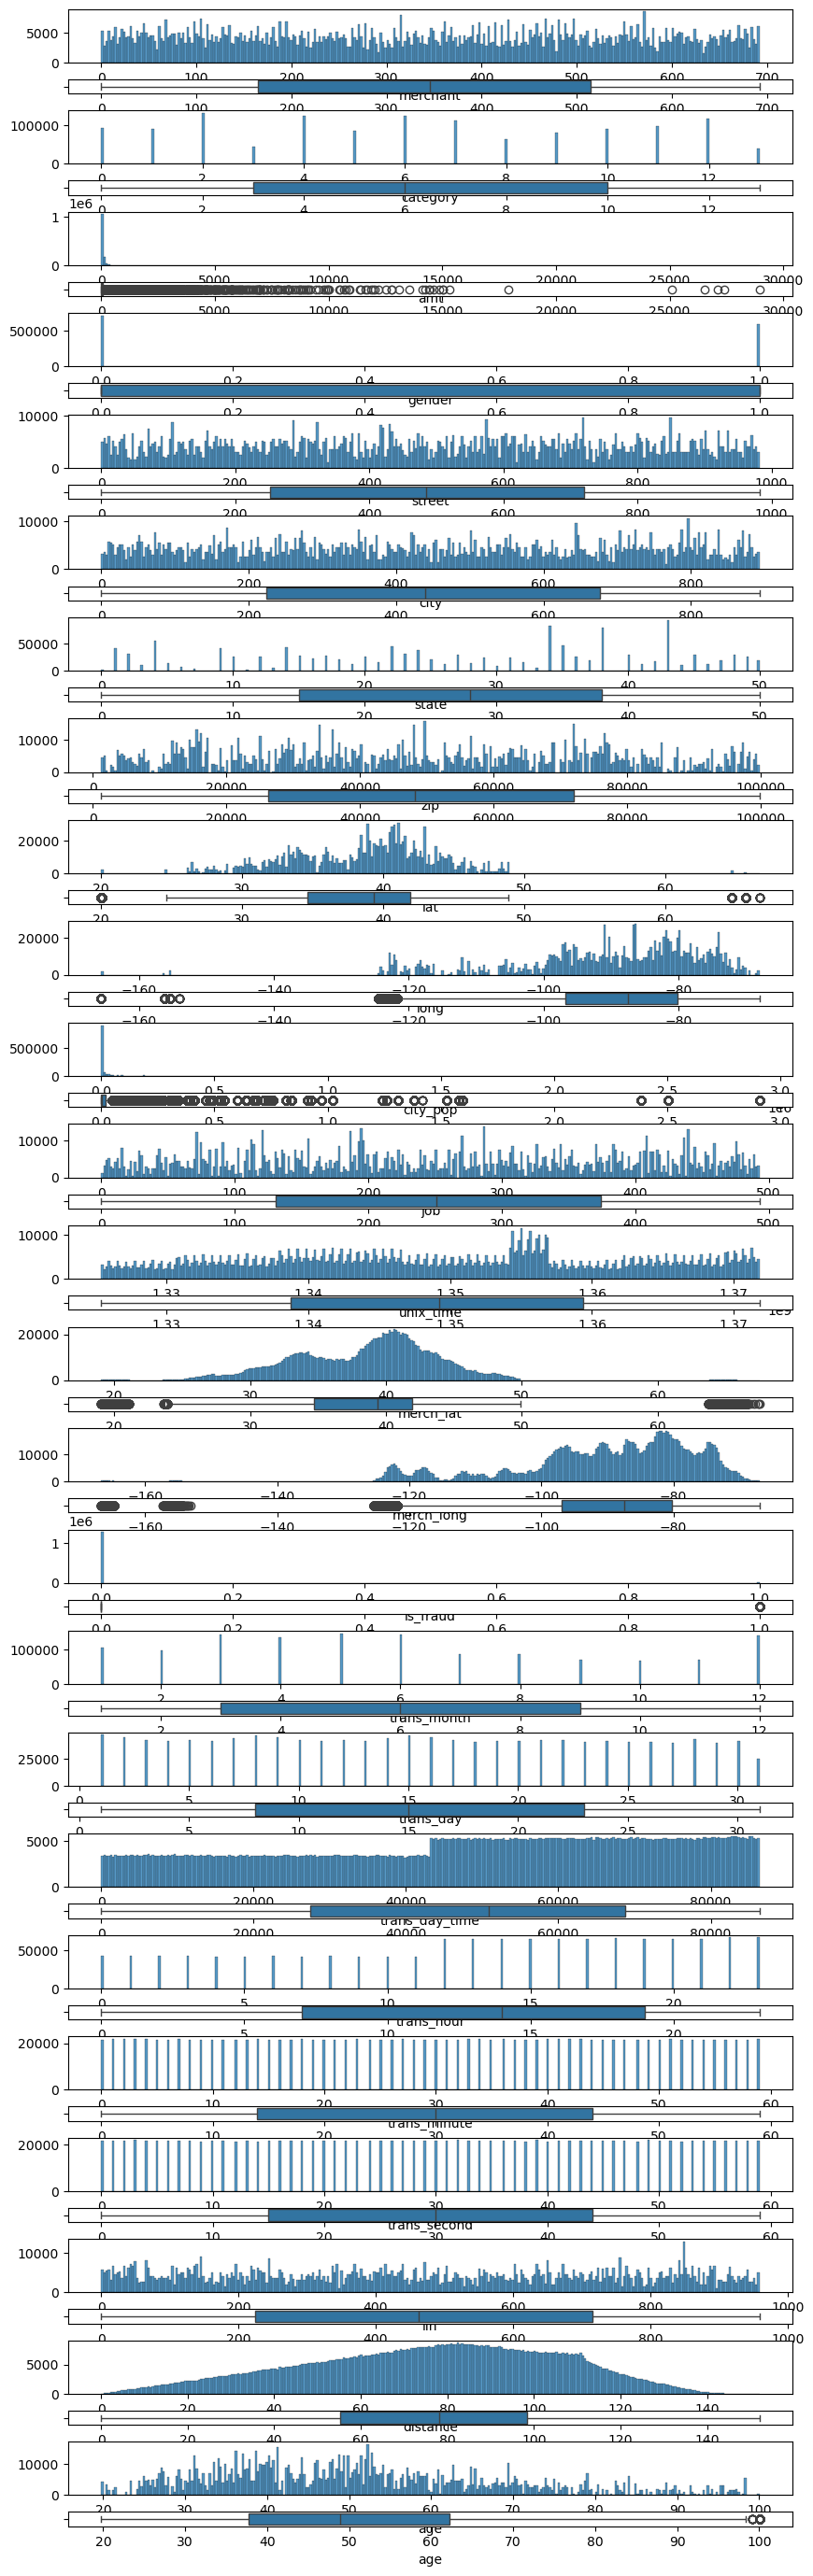

In [55]:
num_cols = df.select_dtypes(include='number').columns
#num_cols = num_cols.drop(['zip', 'lat', 'long', 'merch_lat', 'merch_long'])
fig, axs = plt.subplots(ncols=1, nrows=len(num_cols)*2, figsize=(10, 35), gridspec_kw={'height_ratios': [15, 4] * len(num_cols)})

for i in range(len(num_cols)):
    sns.histplot(df[num_cols[i]], ax=axs[i * 2], bins=300)
    axs[i * 2].set(xlabel=num_cols[i], ylabel=None)
    sns.boxplot(df[num_cols[i]], ax=axs[i * 2 + 1], orient='h')
    axs[i * 2 + 1].set(xlabel=num_cols[i], ylabel=None)
    
plt.subplots_adjust(hspace=0.5)

In [20]:
#most of transactions had low amount, done in cities with low population.There was a spike in transactions amount. Dataset is significantly imbalanced. Most treansactions were made after 12:00 
#at distances about 80km

14:49


C:\Users\dfskl\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


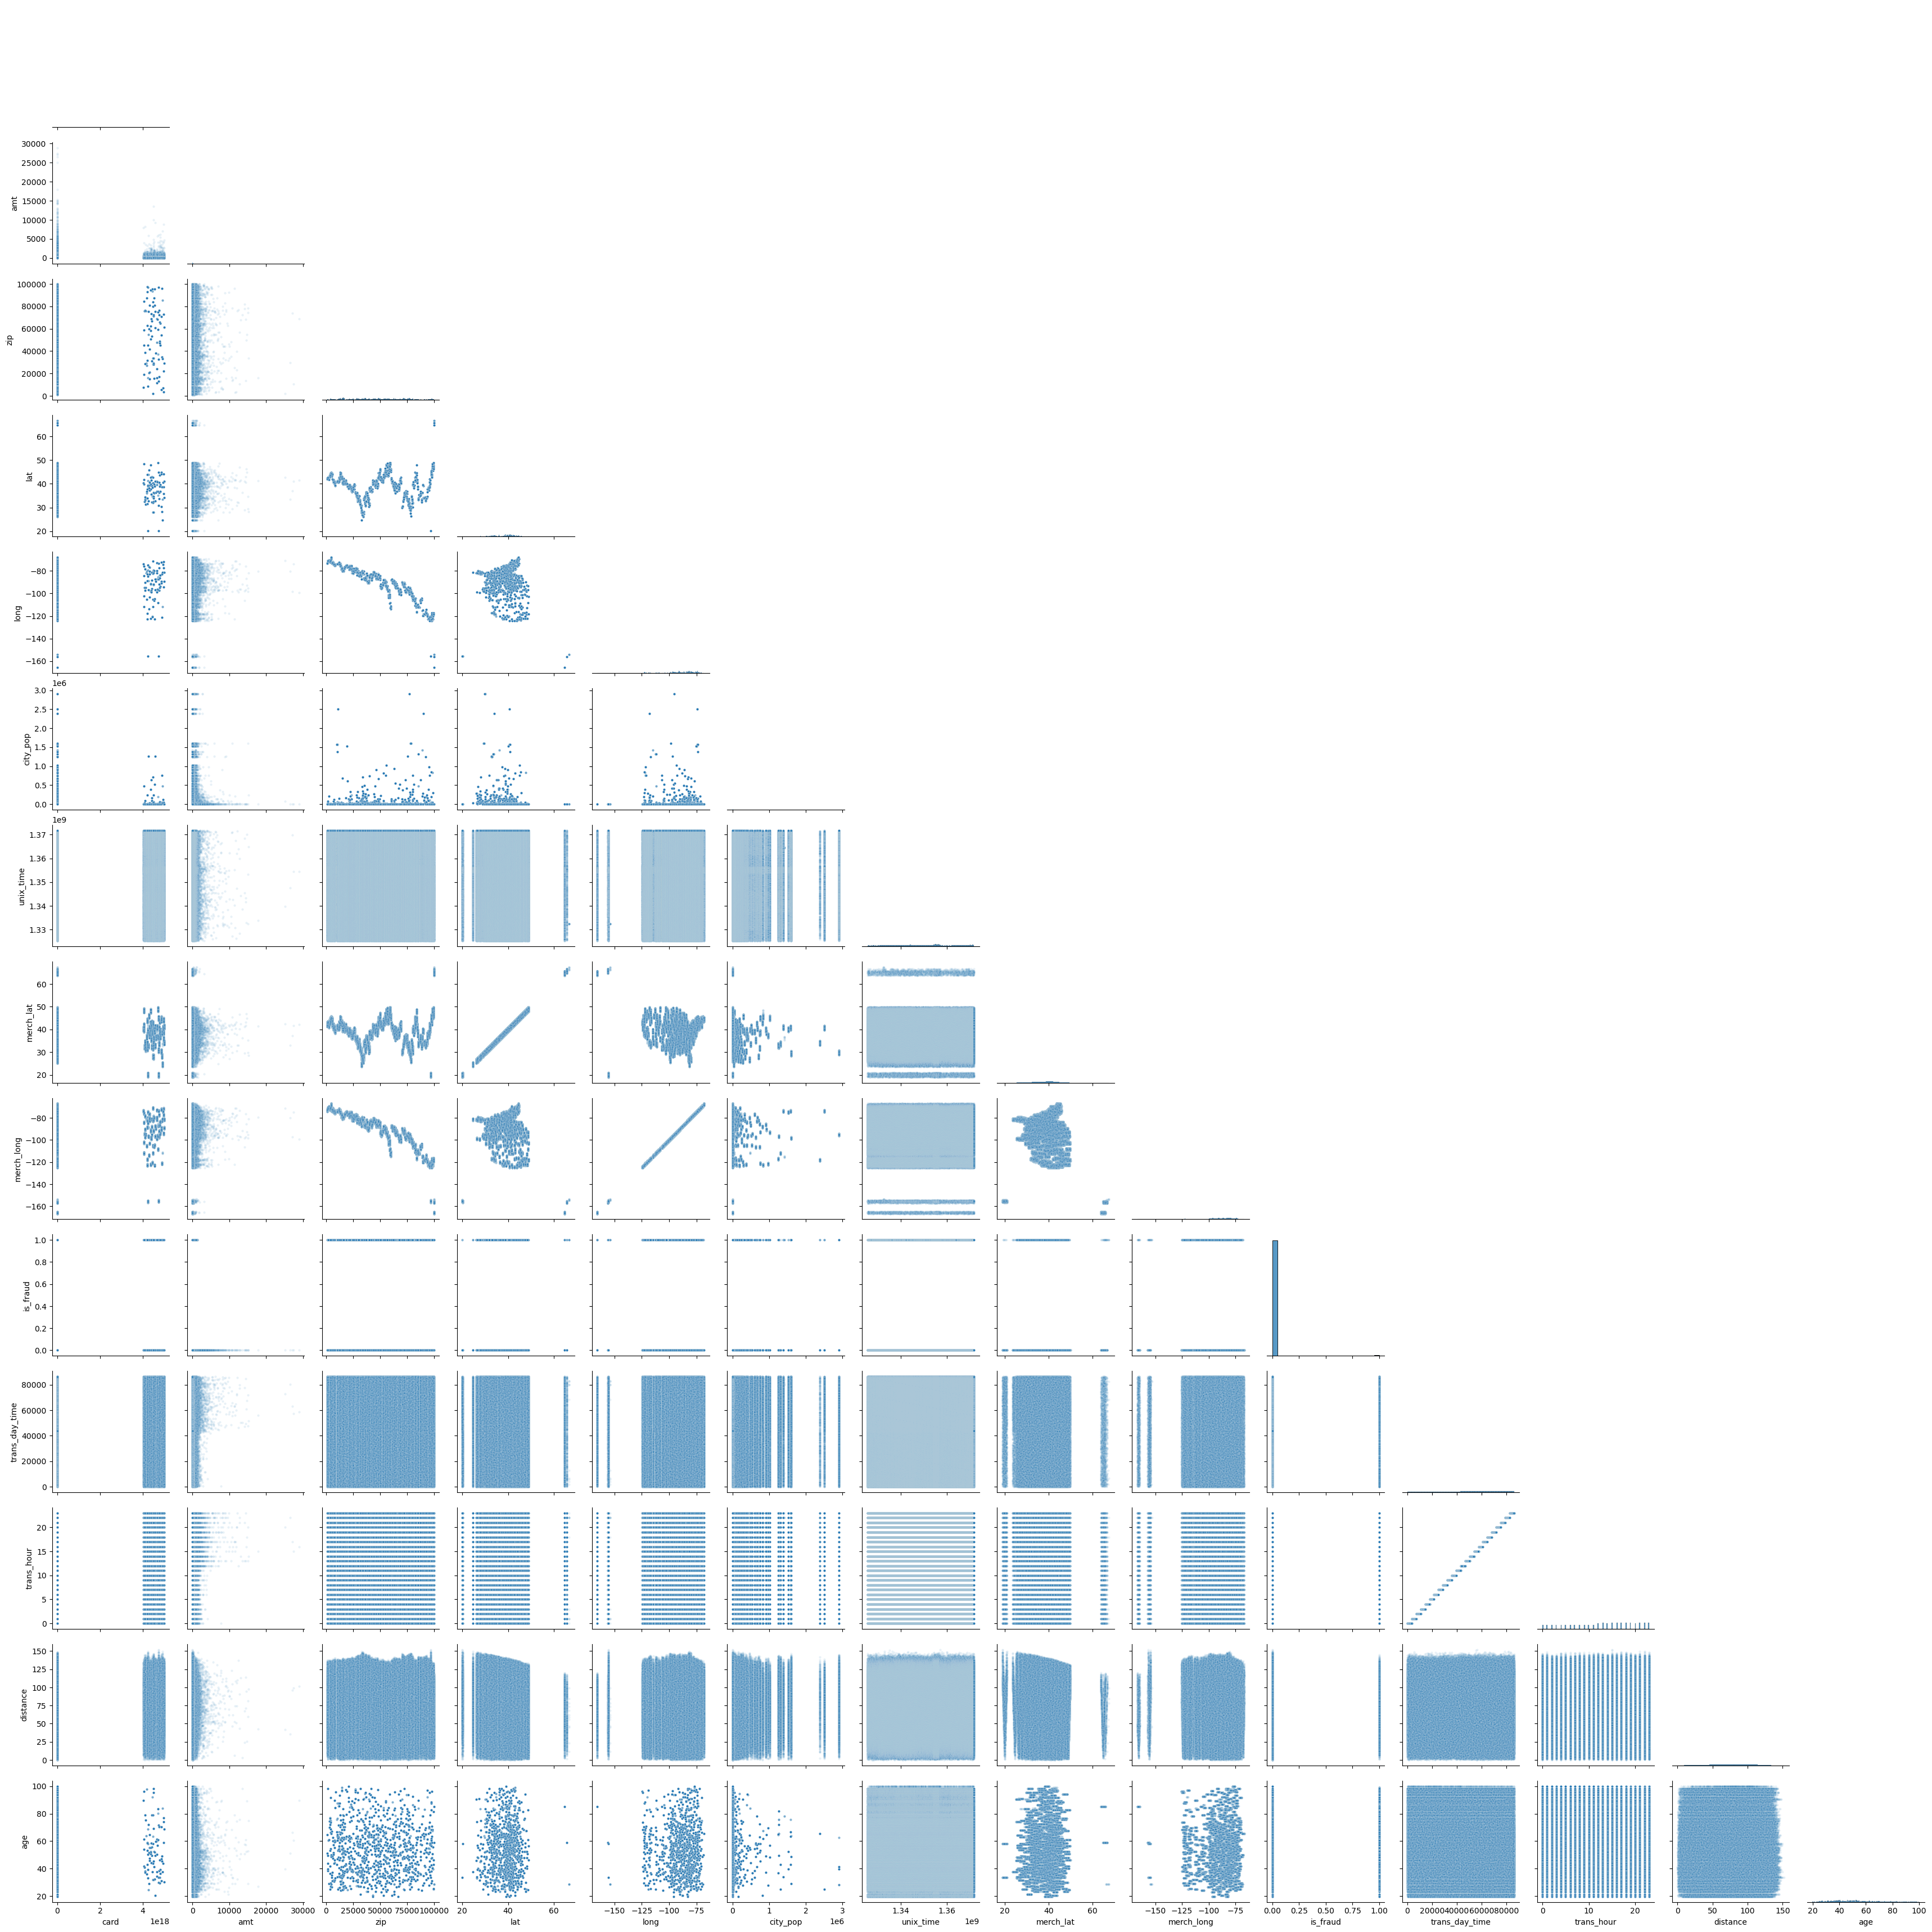

14:52


In [54]:
import time
print(time.strftime("%H:%M", time.localtime()))
sns.pairplot(df, corner = True, plot_kws={'alpha':0.1}, markers='.');
plt.show()
plt.clf()
plt.close() 
print(time.strftime("%H:%M", time.localtime()))

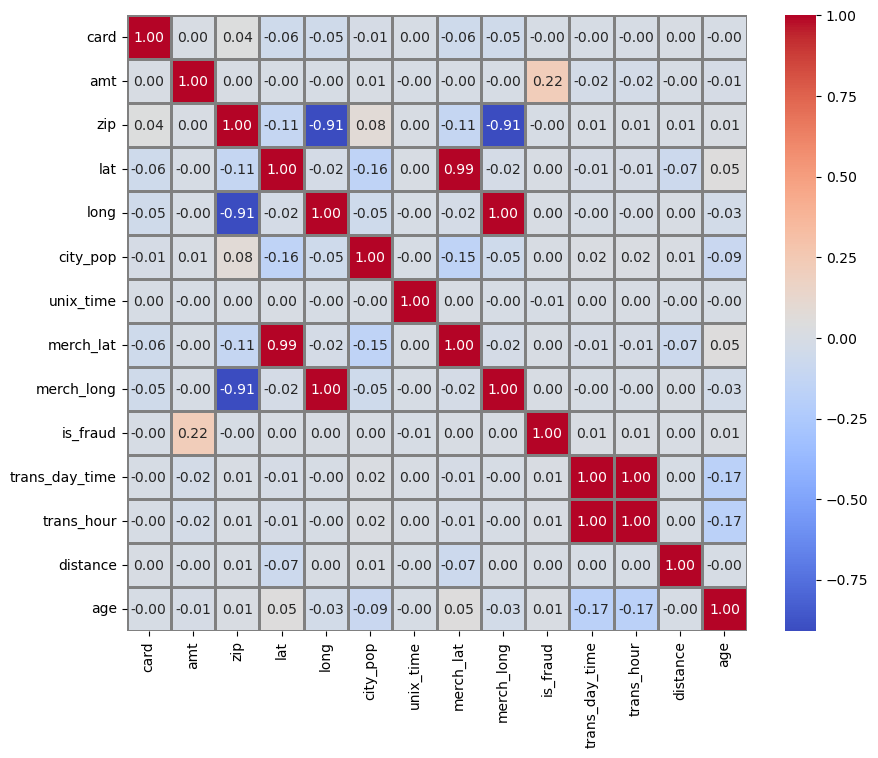

In [52]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=1, linecolor='gray');